Root Mean Squared Error: 1.5306822902728832
R-squared Score: 0.9999639867190481


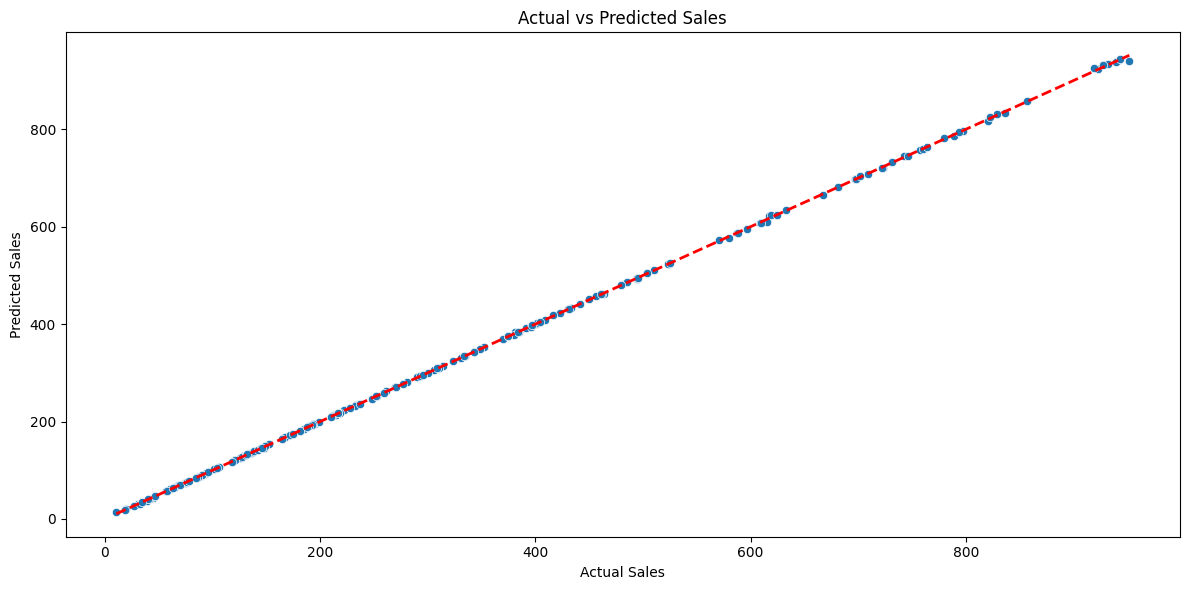

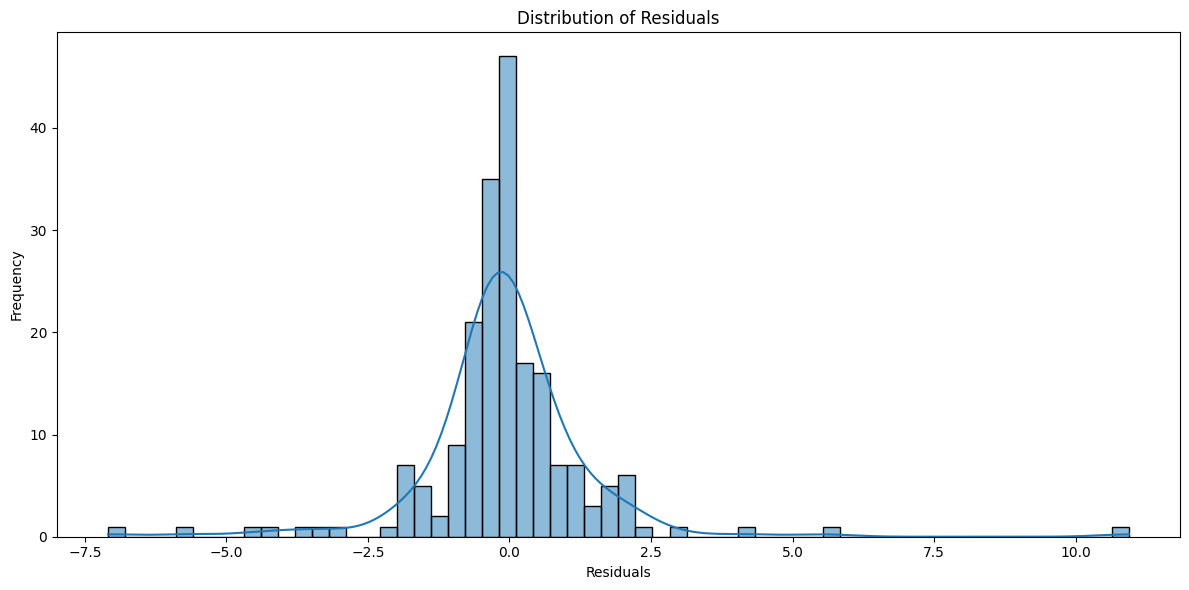

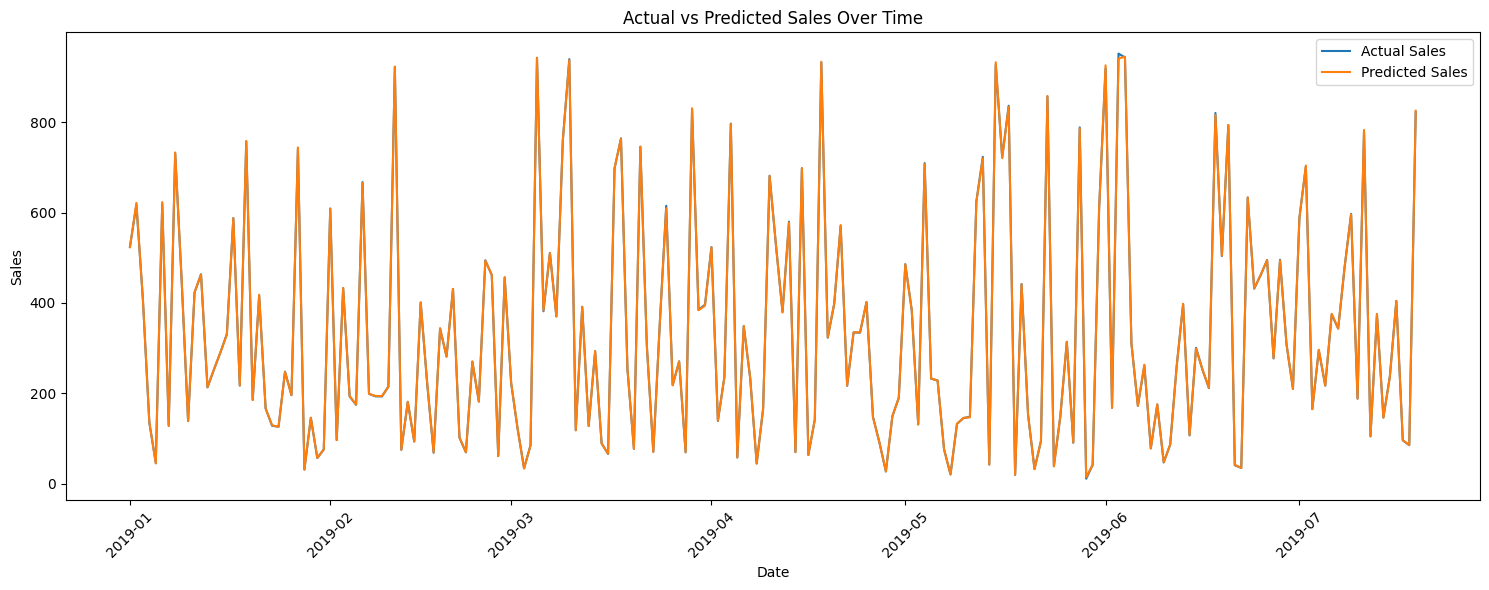

Visualizations have been generated and saved.


In [13]:
# Batc Inference Pipeline Notebook
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el modelo entrenado
best_model = joblib.load('best_rf_model.joblib')

def batch_inference(X_test_file, y_test_file):
    # Cargar los datos de prueba preprocesados
    X_test = pd.read_csv(X_test_file)
    y_test = pd.read_csv(y_test_file)

    # Hacer predicciones
    predictions = best_model.predict(X_test)

    # Crear un dataframe de resultados
    results = pd.DataFrame({
        'Actual_Total': y_test.values.ravel(),
        'Predicted_Total': predictions
    })

    # Calcular métricas de rendimiento
    mse = mean_squared_error(results['Actual_Total'], results['Predicted_Total'])
    rmse = np.sqrt(mse)
    r2 = r2_score(results['Actual_Total'], results['Predicted_Total'])

    print(f"Error Cuadrático Medio de la Raíz: {rmse}")
    print(f"Puntuación R-cuadrado: {r2}")

    return results

# Ejemplo de uso
X_test_file = 'X_test_scaled.csv'
y_test_file = 'y_test.csv'

results = batch_inference(X_test_file, y_test_file)

# Visualizar ventas reales vs ventas predichas
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Actual_Total', y='Predicted_Total', data=results)
plt.plot([results['Actual_Total'].min(), results['Actual_Total'].max()], 
         [results['Actual_Total'].min(), results['Actual_Total'].max()], 
         'r--', lw=2)
plt.xlabel('Ventas Reales')
plt.ylabel('Ventas Predichas')
plt.title('Ventas Reales vs Predichas')
plt.tight_layout()
plt.savefig('comparacion_prediccion_ventas.png')
plt.show()

# Graficar residuos
residuals = results['Actual_Total'] - results['Predicted_Total']
plt.figure(figsize=(12, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Distribución de Residuos')
plt.tight_layout()
plt.savefig('distribucion_residuos.png')
plt.show()

# Si tienes información de fechas en tu conjunto de prueba, puedes agregarla para el gráfico de series de tiempo
# Para este ejemplo, crearemos un rango de fechas simulado
results['Date'] = pd.date_range(start='2019-01-01', periods=len(results), freq='D')

# Gráfico de series de tiempo de ventas reales vs predichas
plt.figure(figsize=(15, 6))
plt.plot(results['Date'], results['Actual_Total'], label='Ventas Reales')
plt.plot(results['Date'], results['Predicted_Total'], label='Ventas Predichas')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('Ventas Reales vs Predichas a lo Largo del Tiempo')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('ventas_a_lo_largo_del_tiempo.png')
plt.show()

print("Las visualizaciones han sido generadas y guardadas.")